# Jena Climate Dataset: Exploratory Data Analysis

**Objective:** Load, inspect, and visualize the features of the Jena Climate dataset to inform our preprocessing and modeling strategy.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20, 10)

### Load and Inspect Data

In [3]:
csv_path = 'data/jena_climate_2009_2016.csv'
df = pd.read_csv(csv_path)

# Parse the 'Date Time' column and set it as the index
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.set_index('Date Time', inplace=True)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (420551, 14)


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


### Visualize Each Feature

Let's plot each feature over time to observe its behavior, trends, and any anomalies.

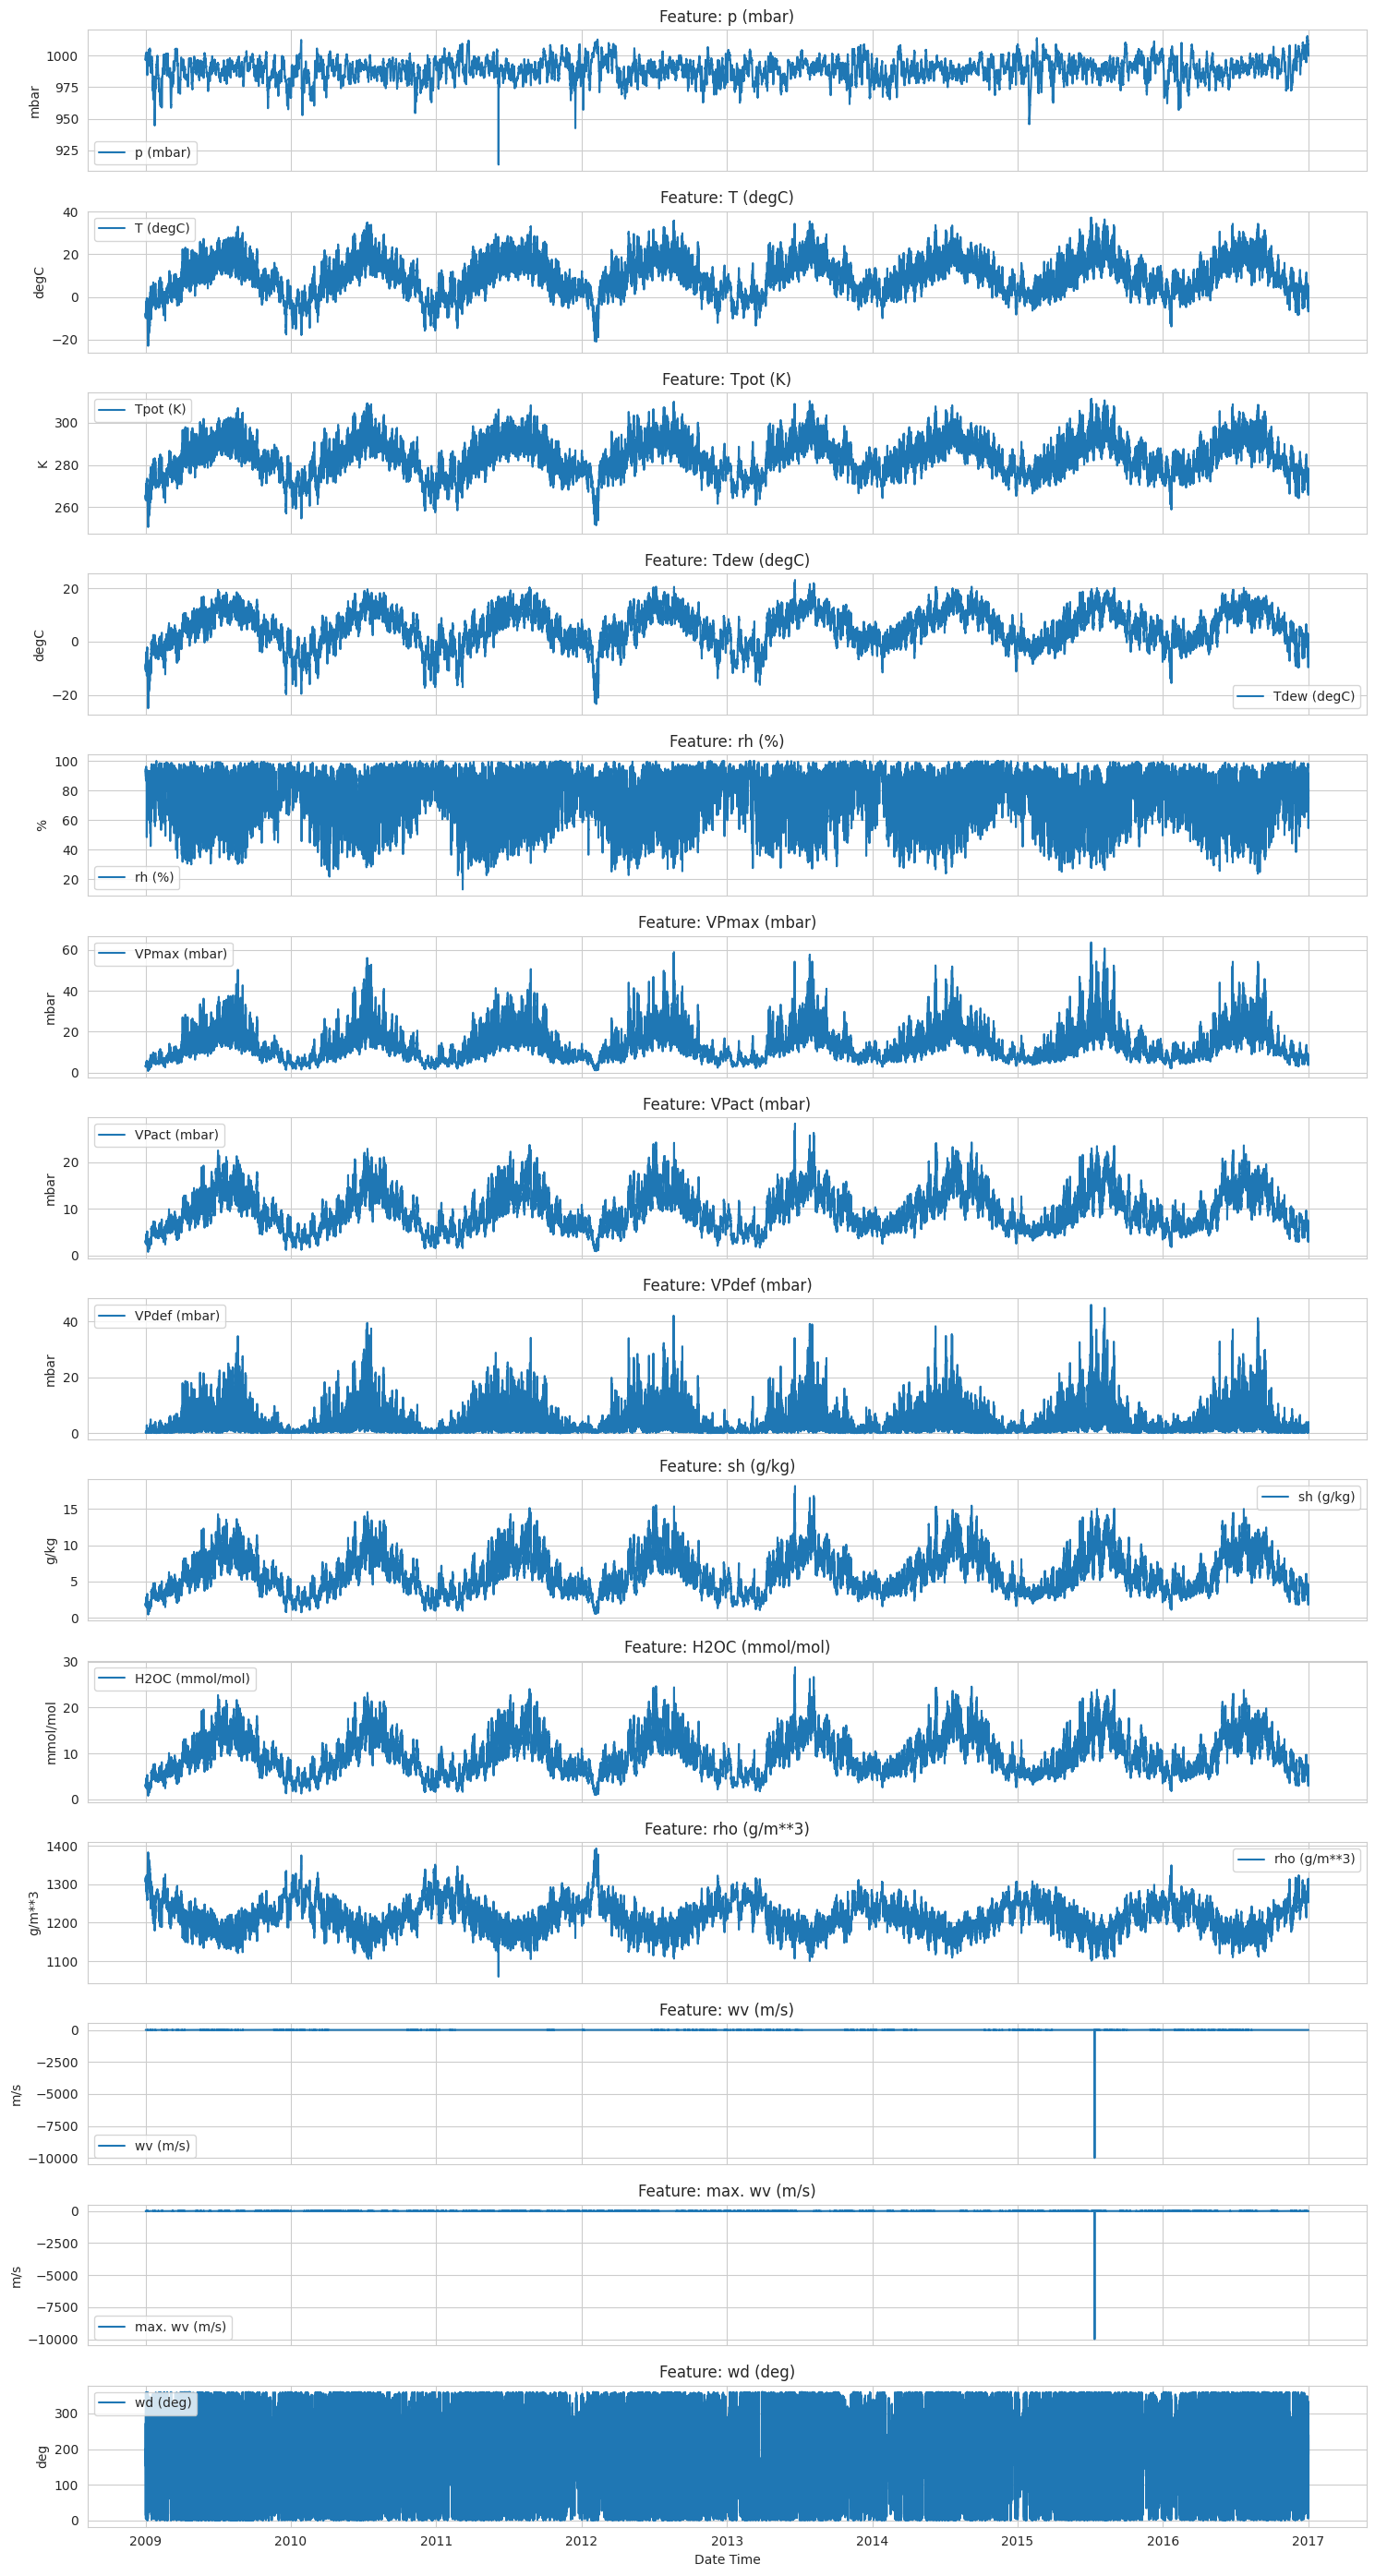

In [5]:
features = df.columns
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(15, 2 * len(features)), sharex=True)

for i, feature in enumerate(features):
    ax = axes[i]
    ax.plot(df.index, df[feature], label=feature)
    ax.set_title(f'Feature: {feature}')
    ax.set_ylabel(feature.split('(')[1].replace(')', ''))
    ax.legend()
    ax.grid(True)

plt.xlabel('Date Time')
plt.tight_layout()
plt.show()

### Initial Observations

1.  **Seasonality:** Most features, especially temperature (`T (degC)`), show a clear yearly seasonal pattern.
2.  **Anomalies:** The wind velocity (`wv (m/s)`) and max wind velocity (`max. wv (m/s)`) features have values of -9999, which are clearly erroneous and must be handled.
3.  **Circular Features:** Wind direction (`wd (deg)`) is a circular feature (360° is the same as 0°). This needs special handling so the model can understand its cyclical nature.
4.  **Data Granularity:** The data is recorded every 10 minutes. This is very high-frequency. We might consider downsampling it to an hourly frequency to capture the most significant patterns without overwhelming the model.